# California Housing (K-means)

---

---

Imported Libraries

In [71]:
# Data processing
# ==================================================================================
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pickle import dump

# Preprocessing and modeling
# ==================================================================================
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score



# Charts
# ==================================================================================
import matplotlib.pyplot as plt
import seaborn as sns

---

## Step 1: Loading the dataset

In [41]:
_df_ = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
_df_.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


>NOTE:  In this case, we are only interested in the `Latitude`, `Longitude` and `MedInc` columns.

In [42]:
# We are only interested in the `Latitude`, `Longitude` and `MedInc` columns.

df= _df_[['Latitude', 'Longitude', 'MedInc']]
df.head(3)

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574


**Description and types of Data**

- `Latitude` --> 

- `Longitude` --> 

- `MedInc` -->

---

## Step 2: Study of variables and their content

In [43]:
# Obtain dimensions

rows, columns = df.shape

print(f"The dimensions of this dataset are: {rows} Rows and {columns} Columns")

The dimensions of this dataset are: 20640 Rows and 3 Columns


In [44]:
# Obtain information about data types and non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [45]:
# Check null values

null_var = df.isnull().sum().loc[lambda x: x > 0] # Number of nulls in each variable.

num_of_null_var = len(null_var) # Number of variables with almost 1 null.

print(f"{null_var}\n\nThe number of null variables are {num_of_null_var}")

Series([], dtype: int64)

The number of null variables are 0


- ### 2.1 Divide the dataset into train and test

Be sure to conveniently split the dataset into `train` and `test` as we have seen in previous lessons. Although these sets are not used to obtain statistics(we don´t need `y` to compare), you can use them to train the unsupervised algorithm and then to make predictions about new points to predict the cluster they are associated with.

In [46]:
# Train - Test - Split
# ===============================================================================
def split(dataset ,
          # target, # In Unsupervised Learning we don`t have target
             test_size=0.2,
               random_state=42):
  
  X = dataset # dataset
#  y = df[target] # Target

  X_train, X_test = train_test_split(X,
                                      # y, # In Unsupervised Learning we don`t have target
                                        test_size = test_size,
                                          random_state = random_state)

  return X_train, X_test

In [47]:
X_train, X_test = split(df)


X_train.head(3)

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563


---

## Step 3: Build a K-means

Classify the data into **6 clusters** using the **K-Means model**. Then store the cluster to which each house belongs as a new column in the dataset. You could call it cluster. To introduce it to your dataset, you may have to categorize it. See what format and values it has, and act accordingly. Plot it in a dot plot and describe what you see.

In [48]:
# Training the model

model = KMeans (n_clusters = 6,
                    random_state=42)

model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [ ]:
y_train = list(model.labels_)

# Create a new column called `cluster` in X_train
X_train['cluster'] = y_train

X_train.head(3)

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1


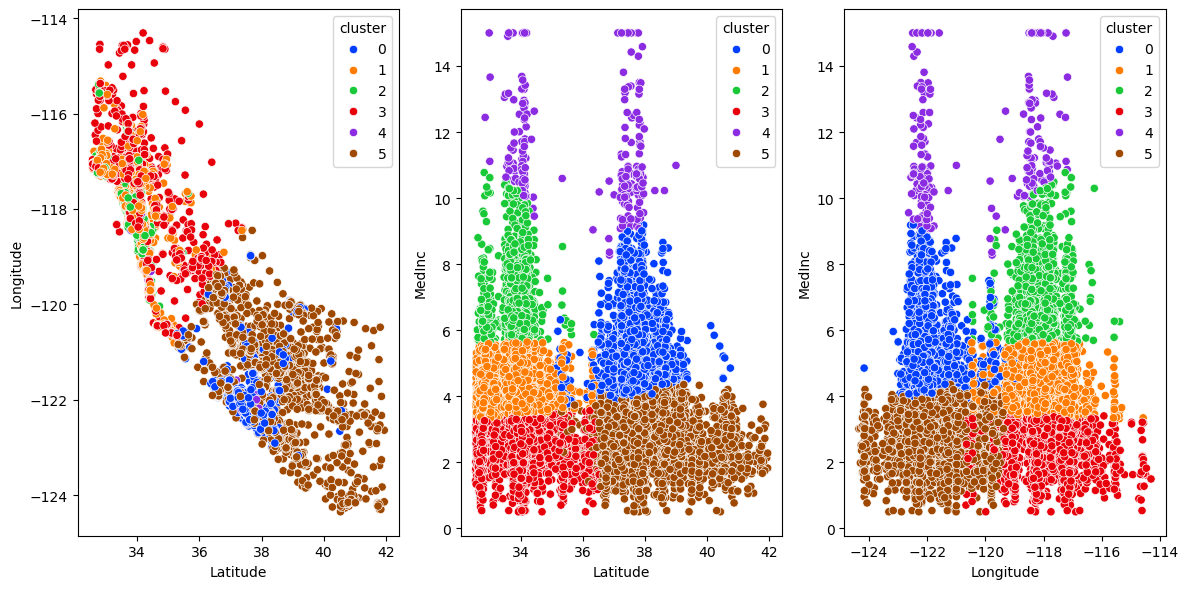

In [54]:
fig, axis = plt.subplots(1,3, figsize = (12,6))

sns.scatterplot(ax = axis[0],
                 data = X_train,
                   x = "Latitude",
                     y = "Longitude",
                       hue = "cluster",
                         palette = "bright")

sns.scatterplot(ax = axis[1],
                 data = X_train,
                   x = "Latitude",
                     y = "MedInc",
                       hue = "cluster",
                         palette = "bright")

sns.scatterplot(ax = axis[2],
                 data = X_train,
                   x = "Longitude",
                     y = "MedInc",
                       hue = "cluster",
                         palette = "bright")

plt.tight_layout()

plt.show()

-----------**Conclusion**-----------

---

# Step 4: Predict with the test set

Now use the trained model with the test set and add the points to the above plot to confirm that the prediction is successful or not

In [55]:
y_test = list(model.predict(X_test))

# Create a new column called `cluster` in X_test
X_test["cluster"] = y_test

X_test.head(3)

,Latitude,Longitude,MedInc,cluster
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5


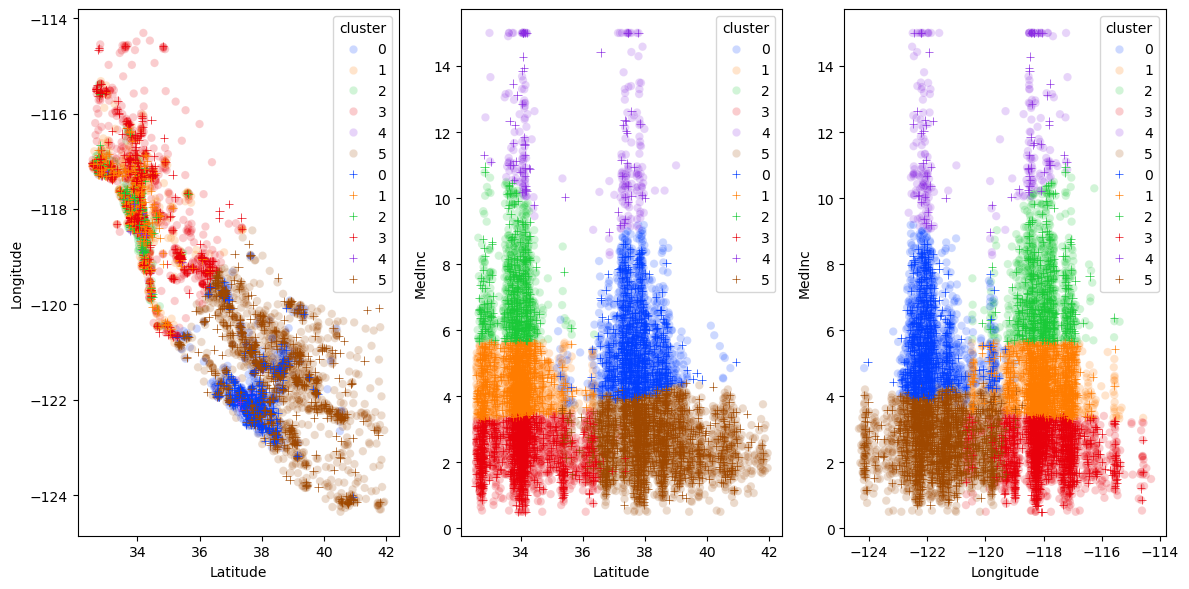

In [60]:
fig, axis = plt.subplots(1,3, figsize = (12,6))

# X_train
# =================================================================

sns.scatterplot(ax = axis[0],
                 data = X_train,
                   x = "Latitude",
                     y = "Longitude",
                       hue = "cluster",
                         palette = "bright", alpha = 0.2)

sns.scatterplot(ax = axis[1],
                 data = X_train,
                   x = "Latitude",
                     y = "MedInc",
                       hue = "cluster",
                         palette = "bright", alpha = 0.2)

sns.scatterplot(ax = axis[2],
                 data = X_train,
                   x = "Longitude",
                     y = "MedInc",
                       hue = "cluster",
                         palette = "bright", alpha = 0.2)

# X_test
# =================================================================

sns.scatterplot(ax = axis[0],
                 data = X_test,
                   x = "Latitude",
                     y = "Longitude",
                       hue = "cluster",
                         palette = "bright",
                           marker = "+")

sns.scatterplot(ax = axis[1],
                 data = X_test,
                   x = "Latitude",
                     y = "MedInc",
                       hue = "cluster",
                         palette = "bright",
                           marker = "+")

sns.scatterplot(ax = axis[2],
                 data = X_test,
                   x = "Longitude",
                     y = "MedInc",
                       hue = "cluster",
                         palette = "bright",
                           marker = "+")

plt.tight_layout()


plt.show()

-----------**Conclusion**-----------

---

## Step 4: Train a supervised classification model

Now that K-Means has returned a categorization (clustering) of the points for the training and test sets, study which model might be most useful and train it. Get the statistics and describe what you see.

This flow is very common when we have unlabeled data: use an unsupervised learning model to label it automatically, and then a supervised learning model.

In [62]:


model_supervised = DecisionTreeClassifier(random_state = 42)
model_supervised.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

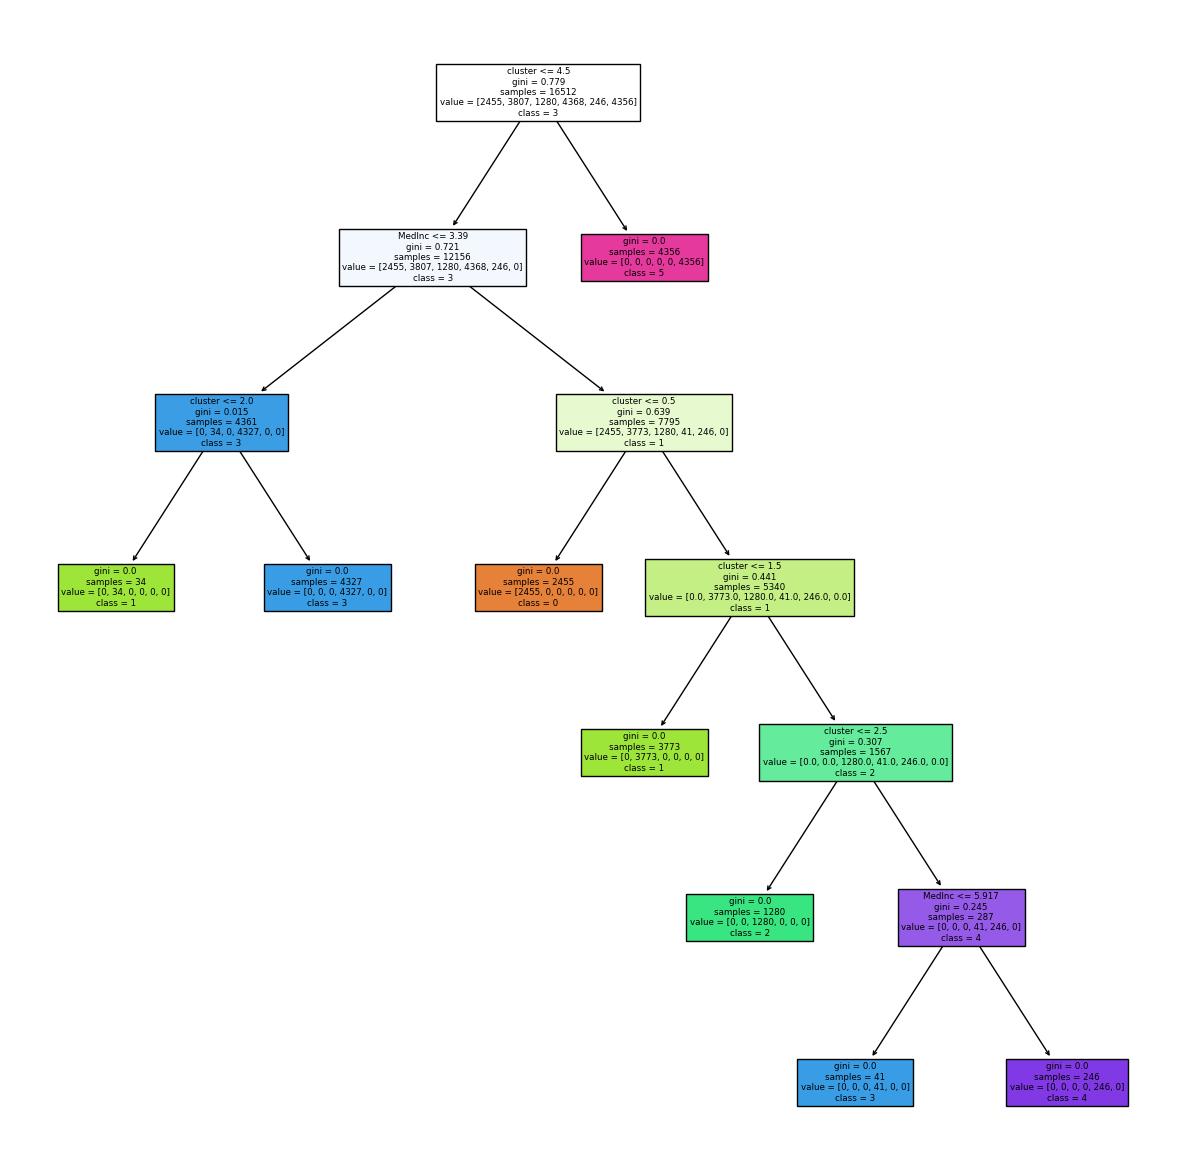

In [65]:

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_supervised, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [66]:
y_pred = model_supervised.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1])

In [ ]:
accuracy_score(y_test, y_pred)

1.0

---

## Step 6: Save the models

In [ ]:


dump(model, open("../models/k-means_Random_State_42.sav", "wb"))
dump(model_supervised, open("../models/decision_tree_classifier_Random_State_42.sav", "wb"))